# Module 2 Final Project Submission - Question 4 of 4

* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **May 10, 2019 at 3:30 pm ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**

### Part I: Is there a statistical difference in the mean quantity of products ordered by customers from Central & South America?

**Ho:** The mean quantity of products ordered by customers is 23.8.

**Ha:** There mean quantity of products ordered by customers from Central America is less than 23.8.

In [1]:
# Import required libraries
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as _stats
from scipy import stats

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Connect an engine and connect to the Northwind database
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)

# Create session to execute SQL commands
Session = sessionmaker(bind=engine)
session = Session()
con = engine.connect()

# Extract Order Detail data as a pandas dataframe using a SQL query
df4 = pd.read_sql_query('''
 SELECT Region, Quantity, OrderID
 FROM Customer
 LEFT JOIN "Order"
 ON Customer.Id
 LEFT JOIN OrderDetail
 ON OrderID
 ''', engine)

2019-05-10 14:17:54,229 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-10 14:17:54,230 INFO sqlalchemy.engine.base.Engine ()
2019-05-10 14:17:54,231 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-10 14:17:54,231 INFO sqlalchemy.engine.base.Engine ()
2019-05-10 14:17:54,233 INFO sqlalchemy.engine.base.Engine 
 SELECT Region, Quantity, OrderID
 FROM Customer
 LEFT JOIN "Order"
 ON Customer.Id
 LEFT JOIN OrderDetail
 ON OrderID
 
2019-05-10 14:17:54,233 INFO sqlalchemy.engine.base.Engine ()


In [13]:
# The Mean of the Quantity for all products ordered
df4.Quantity.mean()

23.812993039443157

In [14]:
# Display panda dataframe grouped by Region
df4.groupby('Region').count()

,Quantity,OrderId
Region,,
British Isles,17240,17240
Eastern Europe,2155,2155
North America,34480,34480
Northern Europe,8620,8620
Scandinavia,6465,6465
South and Central America,45255,45255
Southern Europe,21550,21550
Western Europe,60340,60340


In [15]:
# Combine Central and South America
df4.loc[(df4.Region == 'Central America') | (df4.Region == 'South America'),'Region'] = 'South and Central America'

In [19]:
# Extract Order Detail data as a pandas dataframe using a SQL query
df5 = pd.read_sql_query('''
 SELECT Region, Quantity, OrderID
 FROM Customer
 LEFT JOIN "Order"
 ON Customer.Id
 LEFT JOIN OrderDetail
 ON OrderID
 WHERE Region IN ('Central America', 'South America')  
 ''', engine)

2019-05-10 14:29:18,031 INFO sqlalchemy.engine.base.Engine 
 SELECT Region, Quantity, OrderID
 FROM Customer
 LEFT JOIN "Order"
 ON Customer.Id
 LEFT JOIN OrderDetail
 ON OrderID
 WHERE Region IN ('Central America', 'South America')  
 


INFO:sqlalchemy.engine.base.Engine:
 SELECT Region, Quantity, OrderID
 FROM Customer
 LEFT JOIN "Order"
 ON Customer.Id
 LEFT JOIN OrderDetail
 ON OrderID
 WHERE Region IN ('Central America', 'South America')  
 


2019-05-10 14:29:18,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [24]:
#Look at Dataframe
df5.head()

,Region,Quantity,OrderId
0,Central America,12,10248
1,Central America,10,10248
2,Central America,5,10248
3,Central America,9,10249
4,Central America,40,10249


In [32]:
# Combine Central and South America
df5.loc[(df5.Region == 'Central America') | (df5.Region == 'South America'),'Region'] = 'South and Central America'

In [33]:
#Mean of the Quantity for South & Central America orders
df5.Quantity.mean()

23.812993039443157

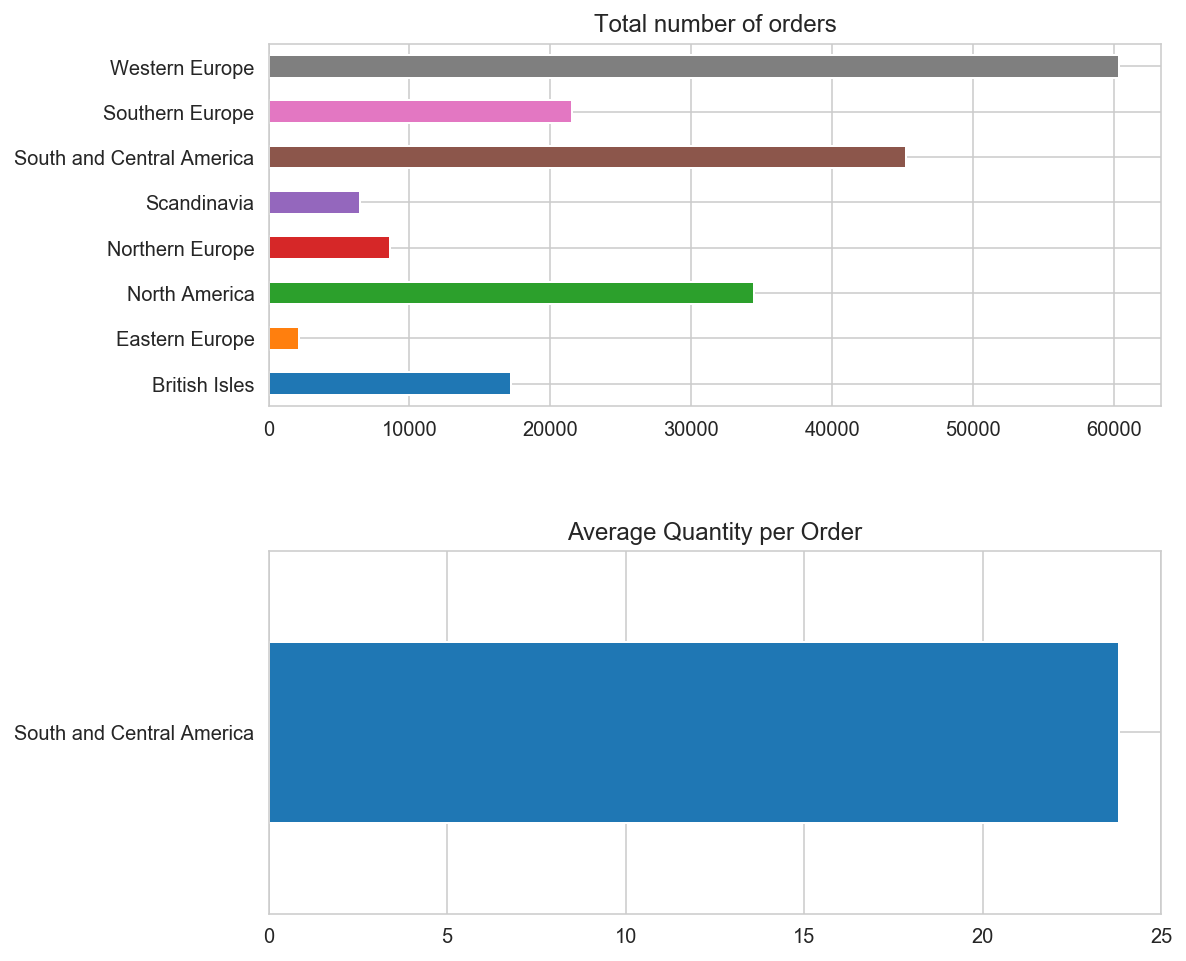

In [35]:
# Plot the average quantity per order for each region
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
df4.groupby(['Region'])['Quantity'].count().plot(kind='barh', ax=ax1)
df5.groupby(['Region'])['Quantity'].mean().plot(kind='barh', ax=ax2)
ax1.set_title('Total number of orders')
ax1.set_ylabel('')
ax2.set_title('Average Quantity per Order')
ax2.set_ylabel('')
fig.subplots_adjust(hspace=0.4);